In [1]:
import sys
sys.path.append('../')

import torch

from skimage.io import imshow

from src.dataset import get_dataloaders
from src.model import get_model
from src.utils import mask2rle, rle2mask
from src.transform import get_transforms

In [2]:
input_size = (320, 480)
transforms = get_transforms(input_size)
_, _, test_dl = get_dataloaders("../data", batch_size=1, num_workers=0, transforms=transforms)
model = get_model("unet")

In [5]:
def visualize(x):
    x = x.squeeze(0)
    x = x.permute(1, 2, 0)
    x = x.numpy()
    imshow(x)   

In [6]:
x = next(iter(test_dl))

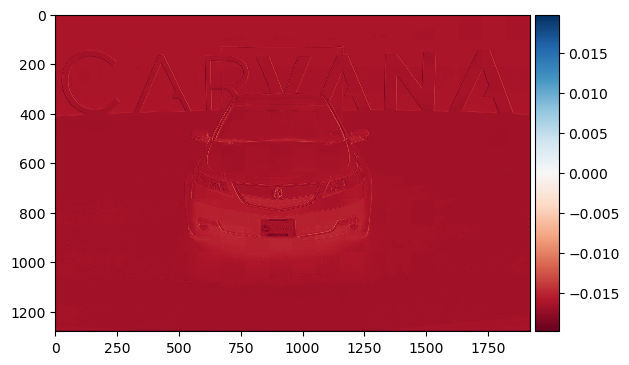

In [7]:
model.eval()
with torch.no_grad():
    visualize(model(x))